# ESG Risk Assessment of the S&P 500
Cora Blomberg 
<br>
June 25th, 2024
<hr>

In [501]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects


In [13]:
file_path = '/Users/corablomberg/Desktop/esg.csv'
esg = pd.read_csv(file_path)

<br><br>
## Data Source : S&P 500 
Pritish Dugar. (2023). S&P 500 ESG Risk Ratings [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DS/3660201
<br>
Alternative url: https://www.kaggle.com/datasets/pritish509/s-and-p-500-esg-risk-ratings


In [610]:
## DATA PREVIEW WITH 10 RANDOM ROWS

useful_columns = ['Name', 'Sector', 'Industry', 'Full Time Employees', 'Total ESG Risk score', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score', 'Controversy Score', 'ESG Risk Percentile', 'ESG Risk Level']
esg_useful_columns = esg[useful_columns].copy()

# remove na's
esg_useful_columns.dropna(inplace=True)

# convert the scores to floats
esg_useful_columns['Total ESG Risk score'] = esg_useful_columns['Total ESG Risk score'].astype(float)
esg_useful_columns['Environment Risk Score'] = esg_useful_columns['Environment Risk Score'].astype(float)
esg_useful_columns['Governance Risk Score'] = esg_useful_columns['Governance Risk Score'].astype(float)
esg_useful_columns['Social Risk Score'] = esg_useful_columns['Social Risk Score'].astype(float)
esg_useful_columns['Controversy Score'] = esg_useful_columns['Controversy Score'].astype(float)

# get random sample 
esg_random_sample = esg_useful_columns.sample(n=10, random_state=1)

gray_to_blue_cmap = LinearSegmentedColormap.from_list('gray_to_blue', ['lightslategray', 'midnightblue'], N=256)

# function to style esg_useful_columns as heatmap of scores
def style_dataframe(df):
    return df.style.format({
        'Total ESG Risk score': '{:.2f}',
        'Environment Risk Score': '{:.2f}',
        'Governance Risk Score': '{:.2f}',
        'Social Risk Score': '{:.2f}',
        'Controversy Score': '{:.2f}'
    }).set_properties(**{'font-size': '10pt'}).background_gradient(axis=0, cmap=gray_to_blue_cmap)

# display the data preview
esg_data_preview = style_dataframe(esg_random_sample)
esg_data_preview


,Name,Sector,Industry,Full Time Employees,Total ESG Risk score,Environment Risk Score,Governance Risk Score,Social Risk Score,Controversy Score,ESG Risk Percentile,ESG Risk Level
501,A.O. Smith Corporation,Industrials,Specialty Industrial Machinery,"12,000",25.40,7.20,6.40,11.90,1.00,51st percentile,Medium
161,Oracle Corp,Technology,Software - Infrastructure,"164,000",13.90,0.50,5.60,7.80,2.00,9th percentile,Low
411,Caterpillar Inc.,Industrials,Farm & Heavy Construction Machinery,"113,200",36.20,10.40,8.10,17.70,4.00,86th percentile,High
428,Broadcom Inc.,Technology,Semiconductors,"20,000",20.00,7.30,6.60,6.00,3.00,28th percentile,Low
216,Marriot International Class A,Consumer Cyclical,Lodging,"411,000",21.40,8.60,3.70,9.20,3.00,34th percentile,Medium
431,"Boston Properties, Inc.",Real Estate,REIT - Office,836,12.50,2.50,5.40,4.50,1.00,6th percentile,Low
250,Jacobs Solutions Inc.,Industrials,Engineering & Construction,"60,000",22.40,5.30,5.60,11.50,3.00,34th percentile,Medium
368,Cvs Health Corporation,Healthcare,Healthcare Plans,"219,000",22.00,0.00,6.20,15.80,3.00,36th percentile,Medium
42,"Universal Health Services, Inc. Class B",Healthcare,Medical Care Facilities,"96,700",33.00,3.70,8.60,20.70,3.00,78th percentile,High
358,Discover Financial Services,Financial Services,Credit Services,"21,100",22.50,0.10,10.50,11.90,2.00,38th percentile,Medium


<div style="border:1px solid black; padding:10px;">
    <strong>Data Overview: </strong> 
This Kaggle dataset showcases the S&P 500 (the 500 largest publicly-traded companies on the US stock exchange). 
Environmental, Social, and Governance (ESG) is a way that companies can be scored and rated against others
regarding issues of sustainability and social justice. The governance, the G in ESG, pertains to companies' internal 
structure and capabilities to address material and potential risks. Therefore, to companies of the S&P 500, ESG factors 
are considered as “risks to business” on a scale of 0 to 25. In the data preview above, which randomly selects 10 
rows from the dataset, the heatmap depicts this scale. Please note that the 'Controversy Score' column operates on a scale 
of 0 to 5, and the 'Total ESG Risk Score' column is bounded by the maximum sum of the three ESG categories: 75.
</div>

<br><br>
## Problem Statement
<hr>

### Which economic sectors, industries, and companies are most at risk to ESG Factors?
<br>

<br>

## Assessment Begins:
<hr>

### Distribution,  Aggregate Sums,  Averages, and  Outliers of ESG Risk Scores
<br>

In [287]:
## CUSTOM PALETTES

categories_palette = { 
    'Environment Risk Score': 'springgreen',  # green
    'Governance Risk Score': 'dodgerblue',   # blue
    'Social Risk Score': 'magenta'        # purple
}

# turns up the transparency
categories_palette2 = {
    'Environment Risk Score': (0, 1, 0, 0.7), 
    'Governance Risk Score': (0, 0.56, 1, 0.7),  
    'Social Risk Score': (1, 0, 1, 0.7)    
}

sectors_palette = {
    "Basic Materials": "crimson",
    "Communication Services": "tomato",
    "Consumer Cyclical": "orange",
    "Consumer Defensive": "gold",
    "Energy": "olivedrab",
    "Financial Services": "mediumseagreen",
    "Healthcare": "darkcyan",
    "Industrials": "darkturquoise",
    "Real Estate": "royalblue",
    "Technology": "mediumpurple",
    "Utilities": "orchid"
} 

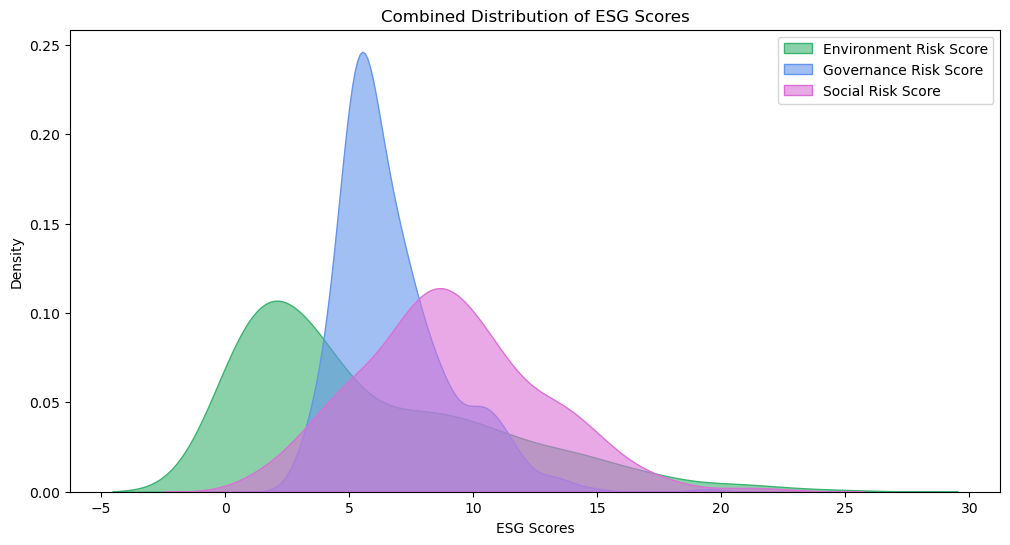

In [127]:
## DENSITY ESTIMATE GRAPH 
esg_clean = esg.dropna()

with warnings.catch_warnings():
    warnings.simplefilter(action = 'ignore', category=FutureWarning)
    
    # plotting the kernel density estimate plots for categories
    plt.figure(figsize=(12, 6))
    for category, color in categories_palette.items():
        sns.kdeplot(esg[category], color=color, fill=True, label=category, alpha = .6)

    plt.title('Distribution of ESG Scores by Category')
    plt.xlabel('ESG Scores')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>ESG Score Distribution Trends by Category: </strong> 
The Kernel Density plot above gives a comprehensive view of the distribution of scores for each ESG category. Starting with environment scores in green, the plot shows that the majority of scores are lower; from 0 to 5. However, environment scores still have a long tail. This will be useful to note for coming visualizations. Second, the governance scores in blue clearly have the largest concentration of scores around 5 to 8 range. The curve quickly rises and quickly falls, however. Lastly, social scores are most normally-distributed of the three categories around the 8 score.   
</div>
<br><br>

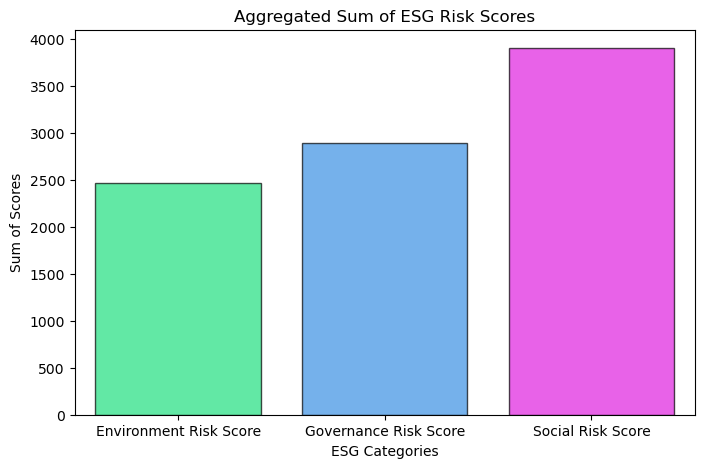

In [624]:
## AGGREGATED SUMS OF ESG CATEGORIES 

esg_risks_sums = esg[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
risk_sums = esg[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].sum()

esg_risks_sums = pd.DataFrame({
    'Category': risk_sums.index,
    'Score': risk_sums.values
})

# plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Score', data=esg_risks_sums, palette=categories_palette, alpha = .7, edgecolor = 'black')

plt.title('Aggregated Sum of ESG Risk Scores')
plt.xlabel('ESG Categories')
plt.ylabel('Sum of Scores')

plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>ESG Category Aggregated Risk Scores: </strong> 
While the last Kernel Denisty plot was helpful for the distribution of scores, it is difficult to visually represent the categories that
contribute the most to high risk scores. The above bar graph clearly shows that Social risks plague S&P 500 companies the most, followed by governance risks, and finally environmental risks. 
</div>
<br><br>

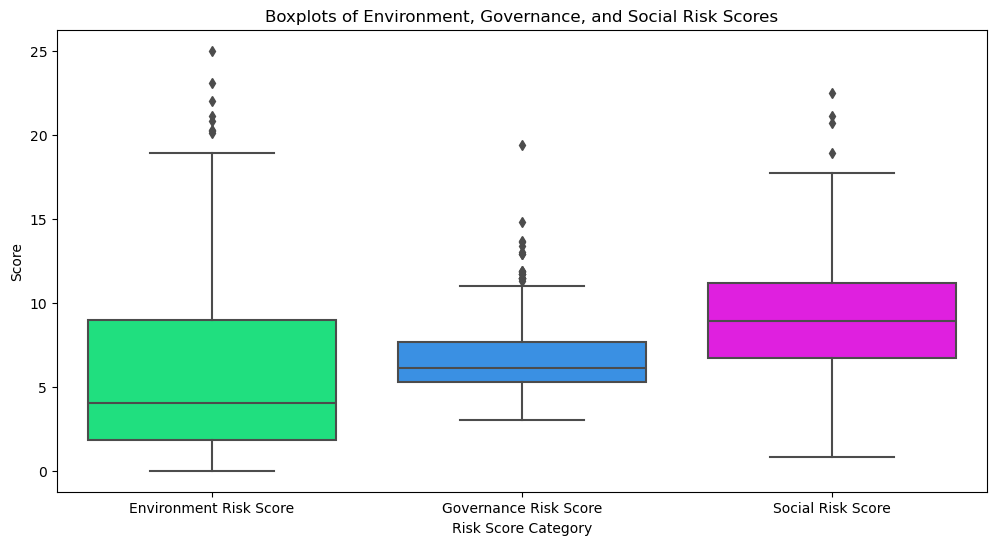

In [201]:
## BOXPLOTS CORRESPONDING TO DENSITY ESTIMATE

esg_scores = esg[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
esg_scores_clean = esg_scores.dropna()

# melt for plotting

esg_boxplots = esg_scores_clean.melt(var_name='Category', value_name='Score')
esg_boxplots['Score'] = pd.to_numeric(esg_boxplots['Score'], errors='coerce')

# boxplot 

plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Score', data=esg_boxplots, palette=categories_palette)
plt.title('Boxplots of Environment, Governance, and Social Risk Scores')
plt.xlabel('Risk Score Category')
plt.ylabel('Score')

plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Scores Distribution continued: Boxplots: </strong> 
 The boxplots above depict the distribution of scores: similar to the initial Kernel Density plot. This plot is particularly useful because it shows that, while environmental risk scores may contribute the least ON AVERAGE, the range of scores is far greater than the other categories. This means that the S&P 500 has very high and very low environmental scores (explaining that long tail in the Kernel Density plot). Second, governance scores unsurprisingly has the smallest window of common scores (depicted by that huge spike in the Kernel Density plot). Third, Social risk scores has a range of scores between the other two categories, but contains the highest scores on average. Next, we'll take a look at the outliers.
</div>
<br><br>

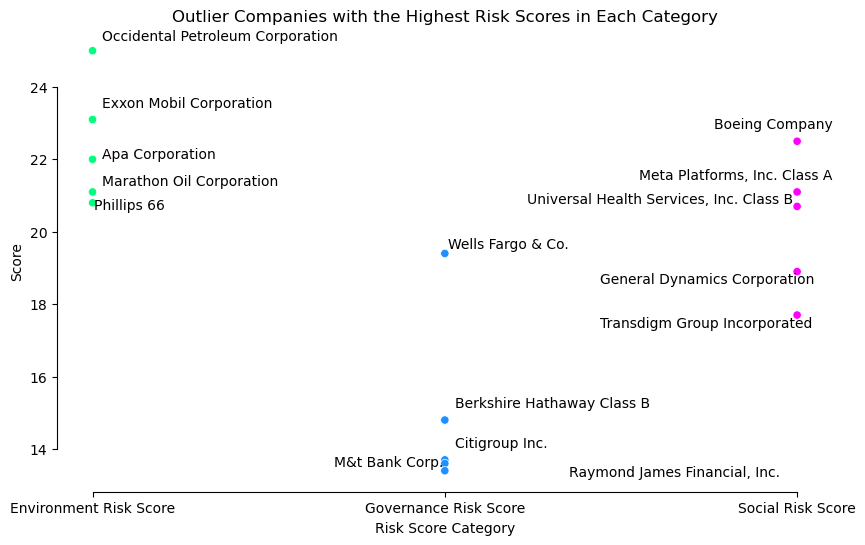

In [634]:
## EXPOSE OUTLIERS
esg_outliers = esg[['Name','Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]

# pivot the esg_outliers
esg_outliers = pd.melt(esg_outliers, id_vars=['Name'], value_vars=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                   var_name='Category', value_name='Score')
esg_outliers = esg_outliers.dropna(subset=['Score'])

# identify the top 10 outliers per category
top_outliers = esg_outliers.groupby('Category').apply(lambda x: x.nlargest(5, 'Score')).reset_index(drop=True)

# plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=top_outliers, x='Category', y='Score', hue='Category', palette=categories_palette, legend = False)

texts = []
for i, point in top_outliers.iterrows():
    texts.append(plt.text(point['Category'], point['Score'], point['Name']))

# using adjustText to prevent text overlap
adjust_text(texts, 
            force_text=(0.5, 0.5),  # applying "equal force" in x and y directions
           )

plt.title('Outlier Companies with the Highest Risk Scores in Each Category')
plt.xlabel('Risk Score Category')
plt.ylabel('Score')
sns.despine(trim=True)
plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Exposing Outliers: </strong> 
While outliers are typically considered unimpactful, for this context, they are very useful. Ouliers depict contributors with the highest ESG scores; companies whose bad scores are well outside the norm. This visualization that exposes the companies with the top 5 worst ESG scores in each category. The most important draw, is that environmental risk score outliers are the highest, followed by social, and finally governance. This means that while environmental risks have the lowest aggregate scores of the S&P 500, it also has the capacity to contain highest of individual scores. 
</div>
<br><br>

<Figure size 1200x600 with 0 Axes>

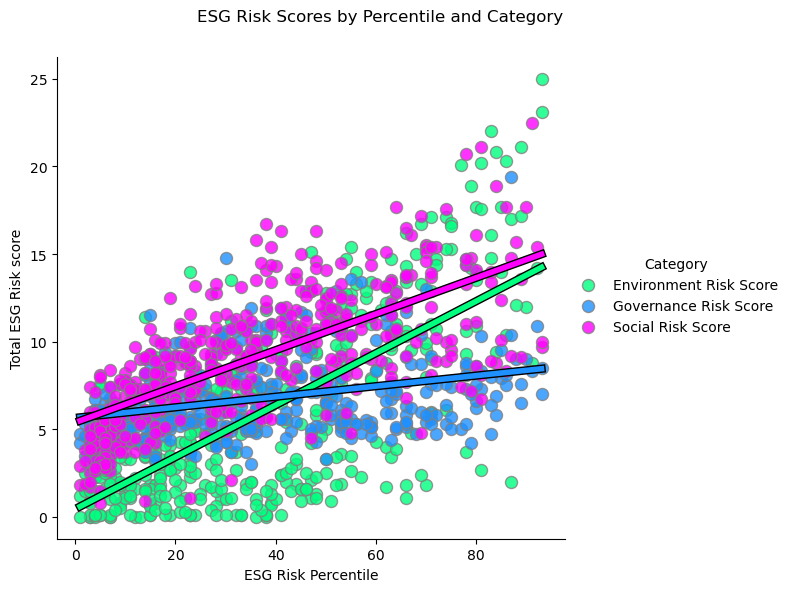

In [640]:
esg_cont_percentiles = esg[['ESG Risk Percentile', 'Governance Risk Score', 'Environment Risk Score', 'Social Risk Score']].copy()

# drop rows with missing values
esg_cont_percentiles.dropna(inplace=True)

# transforming percentile column from strings to floats
esg_cont_percentiles['ESG Risk Percentile'] = esg_cont_percentiles['ESG Risk Percentile'].str.extract('(\d+)').astype(float)

esg_long_percentiles = pd.melt(esg_cont_percentiles, id_vars=['ESG Risk Percentile'], value_vars=['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score'],
                          var_name='Category', value_name='Total ESG Risk score')
plt.figure(figsize=(12, 6))

# create a variable since lmplot works better that way. 
reg_esg = sns.lmplot(x='ESG Risk Percentile', y='Total ESG Risk score', hue='Category', data=esg_long_percentiles,
               palette=categories_palette, height=6, aspect=1, ci=None, markers='o', scatter_kws={'s': 75, 'edgecolor': 'gray'}, line_kws={'linewidth': 4})

# add a black border to the regression lines (needs to import the path_effects from matplotlib)
for ax in reg_esg.axes.flat:
    for line in ax.get_lines():
        line.set_path_effects([path_effects.Stroke(linewidth=6, foreground='black'), path_effects.Normal()])
        
# use variable. to change the graph    
reg_esg.set_titles("{col_name}")
reg_esg.set_axis_labels("ESG Risk Percentile", "Total ESG Risk score")
reg_esg.fig.subplots_adjust(top=0.9) 
reg_esg.fig.suptitle('ESG Risk Scores by Percentile and Category')  

plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Total ESG risk score contribution: </strong> 
Next, we will look at percentile range and total risk scores. Each percentile above, (1/100th), represents five companies and their
aggregated ESG scores by category (three points for each percentile). Logically, as percentiles increase, so does total ESG risk scores. 
(If this graph was not divided by category, this would be one, positively correlated line). What this plot shows, is how category
contribution to total esg risk scores change as the percentiles increase. While governance is relatively steady, it begins off contributing the same amount as social risk scores (environmental scores far below). As percentiles increase, environmental risks become a much larger contributor to total risk scores (as understood by the high-scoring outliers in the previous plot). Social scores remain the highest contributor whose contribution rate (slope) is between governance and environmental.
</div>
<br><br>

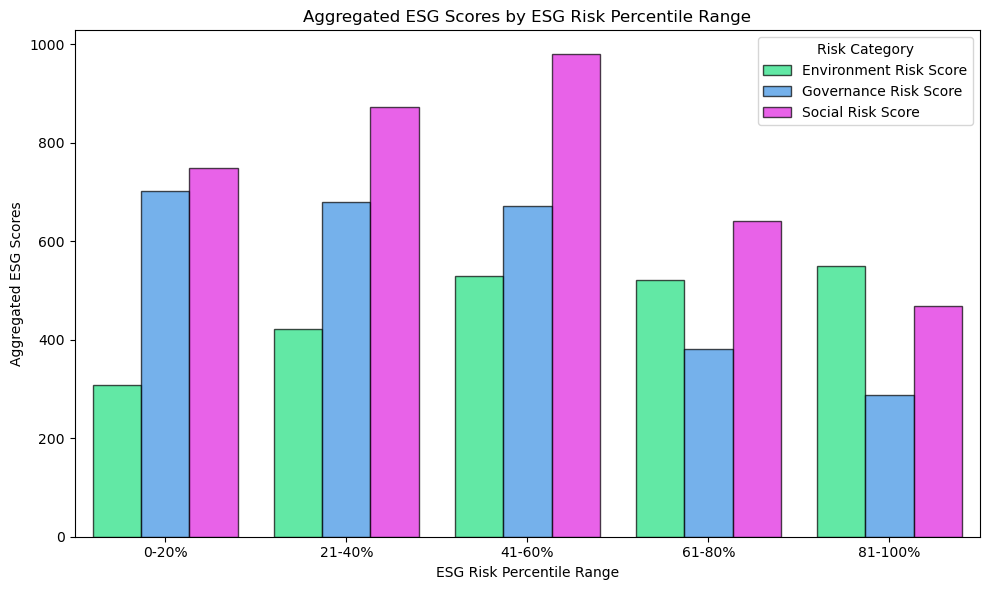

In [648]:
## ESG CATEGORY BREAKDOWN FOR FIVE PERCENTILE RANGES
esg_percentiles = esg.copy()

# drop rows with missing values
esg_percentiles.dropna(inplace=True)

# transforming percentile column from strings to floats
esg_percentiles['ESG Risk Percentile'] = esg_percentiles['ESG Risk Percentile'].str.extract('(\d+)').astype(float)

# creating 5 percentile bins 
esg_percentiles['ESG Risk Percentile Range'] = pd.cut(esg_percentiles['ESG Risk Percentile'], bins=5, labels=['0-20%', '21-40%', '41-60%', '61-80%', '81-100%'])

# group by the percentile range bins and sum the scores for each category
esg_percentiles_scores = esg_percentiles.groupby('ESG Risk Percentile Range', observed=True)[['Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']].sum().reset_index()

# melt the data for plotting
esg_percentiles_scores = esg_percentiles_scores.melt(id_vars='ESG Risk Percentile Range', var_name='Risk Category', value_name='Score')

with warnings.catch_warnings():
    warnings.simplefilter(action = 'ignore', category=FutureWarning)
    
    # create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x = 'ESG Risk Percentile Range', y = 'Score', hue = 'Risk Category', data = esg_percentiles_scores, palette = categories_palette, edgecolor = 'black', alpha = .7)

    plt.title('Aggregated ESG Scores by ESG Risk Percentile Range')
    plt.xlabel('ESG Risk Percentile Range')
    plt.ylabel('Aggregated ESG Scores')
    plt.legend(title='Risk Category')

    plt.tight_layout()
    plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Total ESG risk score contribution continued: </strong> 
Similarly, we can look at the percentiles bucketed into five percentile ranges. Here we can see how ESG categories contribute differently to total ESG scores.
</div>

<br><br>
## Sectors 
<hr>
The following section will explore the sectors that contribute to each category of ESG risk scores
<br><br>

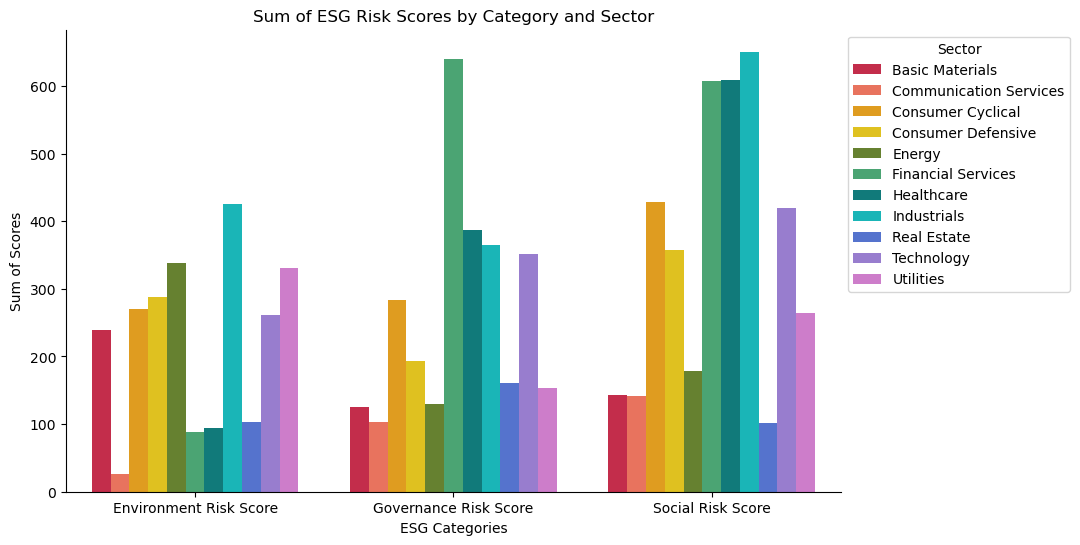

In [513]:
## AGGREGATE SCORES BY CATEGORY AND SECTOR
esg_sectors = esg[['Sector', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
esg_sectors = esg_sectors.dropna(subset=['Sector']) 

# group by 'Sector' and sum ESG scores
esg_risk_sums_by_sector = esg_sectors.groupby('Sector').agg({
    'Environment Risk Score': 'sum',
    'Governance Risk Score': 'sum',
    'Social Risk Score': 'sum'
}).reset_index()

# melt data for plotting
esg_risk_sums_by_sector = pd.melt(esg_risk_sums_by_sector, id_vars=['Sector'], var_name='Category', value_name='Score')

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=esg_risk_sums_by_sector, x='Category', y='Score', hue='Sector', palette = sectors_palette, dodge=True)
plt.title('Sum of ESG Risk Scores by Category and Sector')
plt.xlabel('ESG Categories')
plt.ylabel('Sum of Scores')
plt.legend(title='Sector', loc = 'upper left', bbox_to_anchor=(1, 1))
sns.despine() 
plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>ESG Risk Scores by Sector: </strong> 
Please note the change in color palette. 
The above chart shows how 11 economic sectors contribute to total ESG scores by category. Notable contributers across all categories are 
Financial Services, Healthcare, and Industrials. The following analysis will dive into these sectors and thier sub-sectors (economic
industries).
</div>
<br><br>

In [656]:
# group by sector and aggregate social risk scores
esg_sectors_social = esg.groupby('Sector')['Social Risk Score'].sum().reset_index()

# sort the sectors in descending order and select the top 5
worst_social_sectors = esg_sectors_social.sort_values(by='Social Risk Score', ascending=False).head(5)

# reset the index to clean up the DataFrame's appearance
worst_social_sectors.reset_index(drop=True, inplace=True)

cmap = LinearSegmentedColormap.from_list("violet", ["lightslategray", "midnightblue"], N=256)
    
styled_worst_social_sectors = worst_social_sectors.style.background_gradient(cmap=cmap, subset=['Social Risk Score'], vmin=419, vmax=651)\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
    .set_caption("Top 5 Sectors with the Highest Social Risk Scores")

styled_worst_social_sectors

,Sector,Social Risk Score
0,Industrials,650.500000
1,Healthcare,608.200000
2,Financial Services,606.800000
3,Consumer Cyclical,427.800000
4,Technology,419.600000


<div style="border:1px solid black; padding:10px;">
    <strong>ESG Risk Scores by Sector: </strong> 
The chart shows the computation of industries that contribute the most to social risk scores, and their aggregated social risk scores. 
Colors range from navy to gray, and the steps in color indicate where each sum lies on the range. Since the first three sectors are similar in score (200 more than the final two) they appear most bold. This signifies a dropoff: the top three sectors that contribute to the highest social risk scores lead by quite a significant margin. 
</div>
<br><br>

In [658]:
# group by sector and aggregate social risk scores
esg_sectors_environment = esg.groupby('Sector')['Environment Risk Score'].sum().reset_index()

# sort the sectors in descending order and select the top 5
worst_env_sectors = esg_sectors_environment.sort_values(by='Environment Risk Score', ascending=False).head(5)

# reset the index to clean up the DataFrame's appearance
worst_env_sectors.reset_index(drop=True, inplace=True)

cmap2 = LinearSegmentedColormap.from_list("springgreen", ["lightslategray", "midnightblue"], N=256)
    
styled_worst_env_sectors = worst_env_sectors.style.background_gradient(cmap=cmap2, subset=['Environment Risk Score'])\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
    .set_caption("Top 5 Sectors with the Highest Social Risk Scores")

styled_worst_env_sectors

,Sector,Environment Risk Score
0,Industrials,426.000000
1,Energy,338.500000
2,Utilities,330.700000
3,Consumer Defensive,288.200000
4,Consumer Cyclical,270.300000


<div style="border:1px solid black; padding:10px;">
    <strong>ESG Risk Scores by Sector: </strong> 
Similarly, the worst environmental risk scores are represented by the following sectors. Note that Industrials takes the number one spot
for both social and environmental risk categories. Consumer cyclical (sector for industries susceptible to economic state, like retail stores) has also presented itself in both environmental and social risk categories. From observing the color gradient, the sectors seem to descend more gradually by risk than social scores.
</div>
<br><br>

In [660]:
# group by sector and aggregate social risk scores
esg_sectors_governance = esg.groupby('Sector')['Governance Risk Score'].sum().reset_index()

# sort the sectors in descending order and select the top 5
worst_gov_sectors = esg_sectors_governance.sort_values(by='Governance Risk Score', ascending=False).head(5)

# reset the index to clean up the DataFrame's appearance
worst_gov_sectors.reset_index(drop=True, inplace=True)

cmap3 = LinearSegmentedColormap.from_list("dodgerblue", ["lightslategray", "midnightblue"], N=256)
    
styled_worst_gov_sectors = worst_gov_sectors.style.background_gradient(cmap=cmap3, subset=['Governance Risk Score'])\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([dict(selector='th', props=[('text-align', 'left')])])\
    .set_caption("Top 5 Sectors with the Highest Governance Risk Scores")

styled_worst_gov_sectors

,Sector,Governance Risk Score
0,Financial Services,639.100000
1,Healthcare,387.400000
2,Industrials,364.600000
3,Technology,351.200000
4,Consumer Cyclical,283.200000


<div style="border:1px solid black; padding:10px;">
    <strong>ESG Risk Scores by Sector: </strong>
Finally, table above shows that the Financial Services sector contributes the most to governance risk scores, by a significant margin. Note again, that Industrials and Consumer Cyclical are now thrice offenders of the worst ESG risk score tables. Healthcare and Financial Services contribute to two of the tables.
</div>

<br><br>

## Industries
<hr>
The next section will continue analysis on the top 5 worst sectors of each category, but will further explore the industries that contribute the most to high ESG scores within these sectors.
<br><br>

In [698]:
## FUNCTION FOR THE FOLLOWING GRAPHS
esg_industries = esg[['Sector', 'Industry', 'Environment Risk Score', 'Governance Risk Score', 'Social Risk Score']]
esg_industries = esg_industries.dropna

# function that returns a plot of the top industries within the top 5 sectors above 
def plot_top_industries(df, category):
    
    # group by sector and industries then aggregate
    esg_industries_sums = df.groupby(['Sector', 'Industry'])[category].sum().reset_index()
    
    # find the worst sectors (just like the last tables) 
    worst_sectors = esg_industries_sums.groupby('Sector')[category].sum().nlargest(5).index

    # filter dataframe for the worst sectors then aggregate the risk scores of industries 
    worst_industries = esg_industries_sums[esg_industries_sums['Sector'].isin(worst_sectors)]
    
    # find the worst industries
    top_5_worst_industries = worst_industries.nlargest(5, category)

    # plot
    plt.figure(figsize=(4, 4))
    sns.barplot(data=top_5_worst_industries, x='Industry', y=category, hue='Sector', palette = sectors_palette, dodge=False)
    plt.title(f'Top 5 Worst Industries of {category} category')
    plt.ylabel('Total Risk Score')
    plt.xlabel('Industry')
    plt.xticks(rotation=45, ha='right') #plt.xticks(rotation=45, ha='right')
    plt.legend(title='Sector', loc = 'upper right', bbox_to_anchor=(1.3, 1))
    sns.despine()
    plt.show()

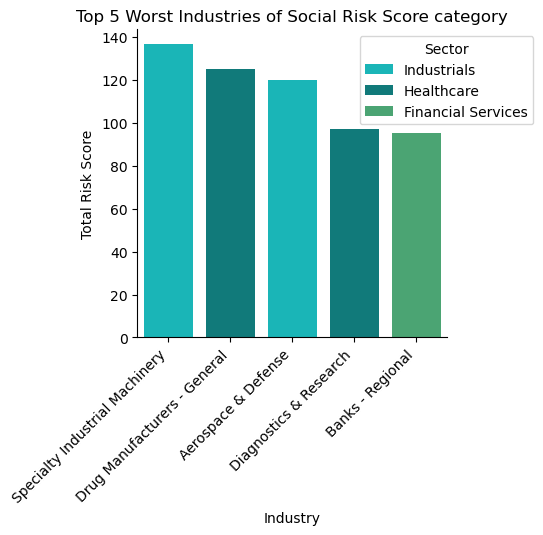

In [700]:
plot_top_industries(esg, 'Social Risk Score')

<div style="border:1px solid black; padding:10px;">
    <strong>Social Risk Scores by Industry and Sector : </strong> 
    Within the top five worst social risk score sectors, the following five industries were computed to contribute the most to high social scores. Industries are labeled on the x-axis with their corresponding economic sector coloring the bar. Industrials and Healthcare sectors make up 4/5 of these sub-sectors (industries). Also note; these industries may involve manufacturing/factory conditions which may indicate the high social risk scores due to labor rights and exploitative conditions. 
</div>
<br><br>

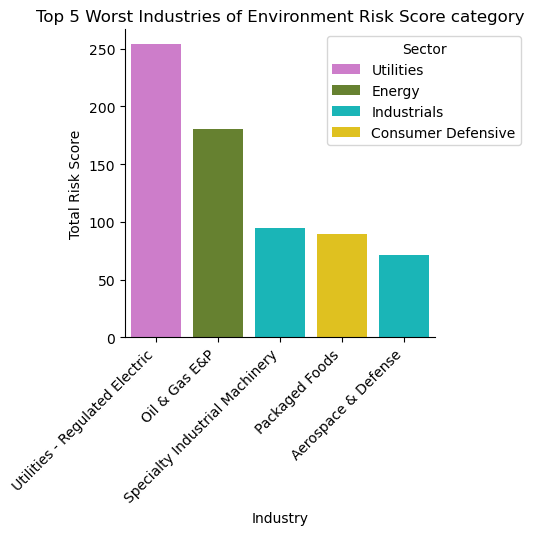

In [703]:
## ENVIRONMENT WORST INDUSTRIES
plot_top_industries(esg, 'Environment Risk Score')

<div style="border:1px solid black; padding:10px;">
    <strong>Environmental Risk Scores by Industry and Sector : </strong> 
The worst industry in the environmental sector is easily utilities. Consider that US energy consumption is a lot higher than other countries. Utilities contribution to high social risk scores could be consumer-demand driven rather than revenue driven. Oil & gas is no surprise here, and notably, Specialty Industrial Machinery and Aerospace Defense have made both environmental and social risk lists.
</div>
<br><br>

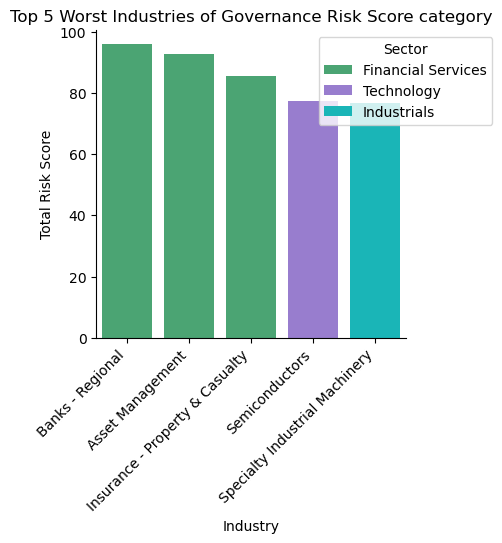

In [705]:
plot_top_industries(esg, 'Governance Risk Score')

<div style="border:1px solid black; padding:10px;">
    <strong>Governance Risk Scores by Industry and Sector : </strong> 
Financial Services sector represents the top three industries with the worst governance scores. This indicates a significant area for growth for banks, asset management, and insurance industries. It is possible that poor governance of social and environmental risks is derived from these industries ideas of materiality (financial return is all that is material). 
</div>
<br><br>

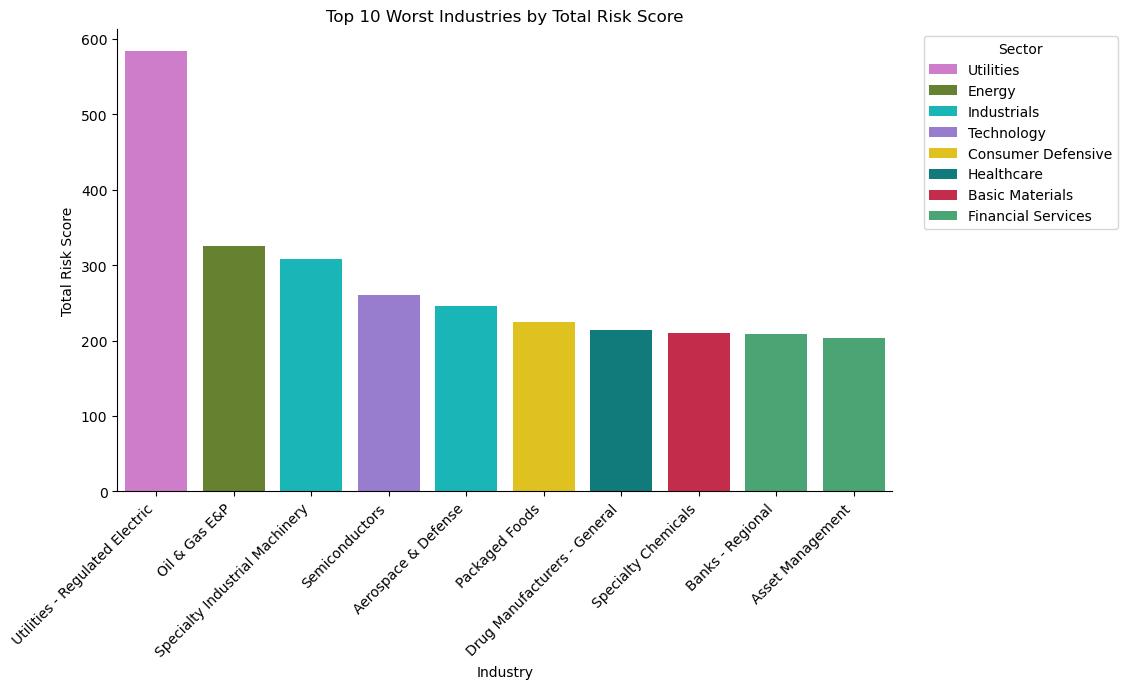

In [464]:
esg_agg_industries = esg[['Sector', 'Industry', 'Total ESG Risk score']]
esg_agg_industries = esg_agg_industries.dropna

esg_agg_industries = esg.groupby(['Sector', 'Industry'])['Total ESG Risk score'].sum().reset_index()

agg_worst_sectors = esg_agg_industries.groupby('Sector')['Total ESG Risk score'].sum().nlargest(10).index

# find the top 10 industries by total risk score
agg_worst_industries = esg_agg_industries[esg_agg_industries['Sector'].isin(agg_worst_sectors)]

agg_worst_industries = agg_worst_industries.nlargest(10, 'Total ESG Risk score')

#plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=agg_worst_industries, x='Industry', y='Total ESG Risk score', hue='Sector', palette=sectors_palette, dodge=False)
plt.title('Top 10 Worst Industries by Total Risk Score')
plt.ylabel('Total Risk Score')
plt.xlabel('Industry')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sector', loc='upper right', bbox_to_anchor=(1.3, 1))
sns.despine()

plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Total ESG Risk Scores by Industry and Sector : </strong> 
The above graph depicts the top 10 industries that contribute the most to high ESG scores. From this lens, we can see just how significantly the Utilities industry contributes. It is important to understand, that while utilities have higher scores, there are fewer firms, than say, in specialty industrial machinery. 
</div>
<br><br>

<br> 

## Final Analysis
<hr>

### Controversy scores, ESG risk levels, & Company size
<br><br>

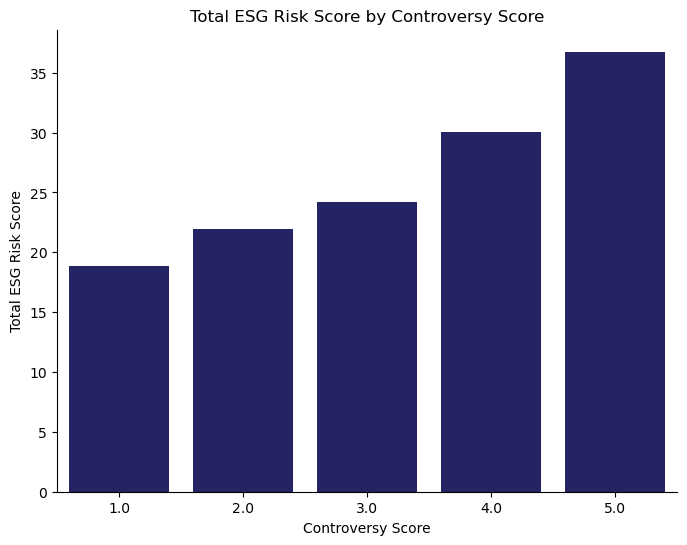

In [580]:
## CONTROVERSY SCORES AND TOTAL RISK SCORES
esg_controversy = esg[['Controversy Score', 'Total ESG Risk score']]

#sort controversy scores
esg_controversy = esg.sort_values('Controversy Score')

# Creating the bar chart
plt.figure(figsize=(8, 6))
bar_plot = sns.barplot(x='Controversy Score', y='Total ESG Risk score', data=esg_controversy, errorbar=None, color='midnightblue')

# Adding chart labels and title
plt.title('Total ESG Risk Score by Controversy Score')
plt.xlabel('Controversy Score')
plt.ylabel('Total ESG Risk Score')
sns.despine()

# Show the plot
plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Correlation between controversy scores and ESG risk scores : </strong> 
    Controversy scores are another category of ESG that isn't always included, however, it can lead to powerful insights. Controversy score is the tendency for firms to have controversies and thier ability to handle the consequences of poor governance. In a way, it is an extention of the governance risk category. The above bar chart shows controversy scores from 1 to 5 and the aggregated sum of ESG risk scores that corresopond. Intuitively, as controversy scores increase, so do ESG risk scores.
</div>
<br><br>

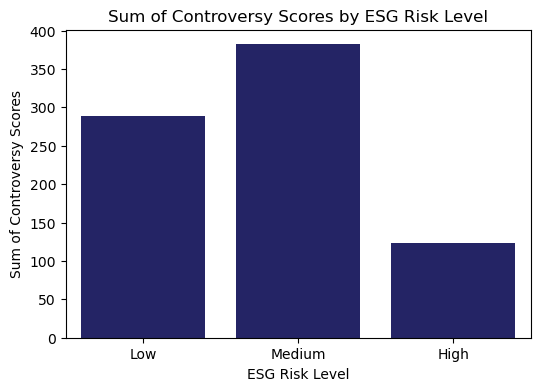

In [594]:
esg_risk_level = esg[['Controversy Score', 'ESG Risk Level']]
esg_risk_level = esg_risk_level.dropna()

esg_risk_controversy = esg_risk_level.groupby('ESG Risk Level')['Controversy Score'].sum().reset_index()

plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x='ESG Risk Level', y='Controversy Score', color ='midnightblue', data = esg_risk_controversy, order=['Low', 'Medium', 'High'])

plt.title('Sum of Controversy Scores by ESG Risk Level')
plt.xlabel('ESG Risk Level')
plt.ylabel('Sum of Controversy Scores')

# Display the plot
plt.show()

<div style="border:1px solid black; padding:10px;">
    <strong>Correlation between ESG Risk Levels and Controversy scores: </strong> 
Counterintuitively, when bucketed by ESG Risk Level, we can see that aggregated controversy scores are highest in the medium esg risk level, and the high esg risk level has the least amount of aggregated controversy scores. This has to be due to most of the companies in the S&P 500 lying in that low to medium esg risk level range. 
</div>
<br><br>

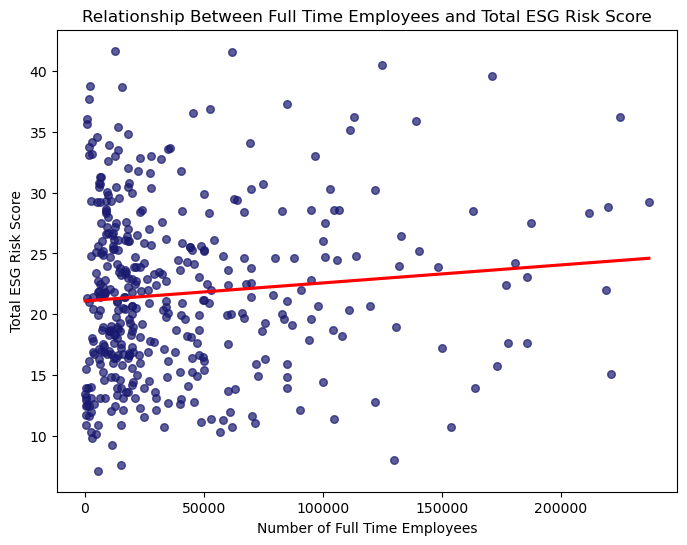

In [576]:
filtered_esg_employees = esg_employees[(esg_employees['Full Time Employees'] >= 0) & (esg_employees['Full Time Employees'] <= 250000)]

# scatterplot with a regression line without a confidence interval
plt.figure(figsize=(8, 6))
sns.regplot(x='Full Time Employees', y='Total ESG Risk score', data=filtered_esg_employees, color ='midnightblue',
            scatter_kws={'s': 30, 'alpha': 0.7}, line_kws={'color': 'red'}, ci=None)
plt.title('Relationship Between Full Time Employees and Total ESG Risk Score')
plt.xlabel('Number of Full Time Employees')
plt.ylabel('Total ESG Risk Score')

plt.show()


<div style="border:1px solid black; padding:10px;">
    <strong>Correlation between company size and total ESG risk scores: </strong> 
The scatterplot aims to explore the correlation between company size and ESG Risk. Company size, in the plot, is determined by the number of employees rather than company wealth. The near-flat regression line indicates that there is no reliable correlation between company size and ESG scores. Even narrowing the sample size only gives way to a slightly more significant positive correlation, however, the data is still pretty widespread with no reliable indication of correlation. 
</div>
<br><br>

# Conclusion 
<hr>
<br>

ESG risk scores have uneven distribution. Environmental risk scores have the largest range, but lowest scores on average. Environmental risks also have the highest outlier scores. Governance risks have the smallest range of the three categories, and has the second lowest scores on average. Social risk scores have an average-sized range, but the highest scores on average. Aggregated social risk scores are  highest sum of the three categories, meaning, that the social category has the most need for improvement for S&P 500 companies. The outlier companies (the companies with abnormally high scores) tended to be oil & gas companies for the environmental category, financial assets & banks for the governance category, and healthcare and manufacturers for the social category. Overall, the sectors that contribute the most to high ESG risk scores are: Industrials, Energy, Healthcare, and Financial Services. The sub-sectors (industries) that contribute the most are: Utilities, Oil & gas, and Specialty Industrial Machinery. Many of the other top industries involve manufacturing. Controversy scores rise with ESG risk scores, but there are fewer firms with high ESG risk scores and thus controversy scores. Company size has little to no impact on ESG scores. Sectors and industries are a much more reliable predictor of ESG risk scores than number of employees. In future analysis, it would be exciting to explore the relationship between company value and esg risk score. Unfortunately that is not within the bounds of the dataset. 
